In [36]:
import numpy as np
import pandas as pd
import xgboost as xgb

np.random.seed(2018)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
trn = pd.read_csv('/Users/kimginam/Kaggle/santander-product-recommendation/train_ver2.csv')
tst = pd.read_csv('/Users/kimginam/Kaggle/santander-product-recommendation/test_ver2.csv')
trn.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [3]:
for col in df.columns:
    print('{}\n'.format(df[col].head()))

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object

0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64

0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object

0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object

0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64

0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object

0    1
1    1
2    1
3    1
4    1
Name: indrel_1mes, dtype: obje

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [5]:
df.shape

(13647309, 48)

In [11]:
cat_cols = [col for col in trn.columns[:24] if trn[col].dtype in [object]]
trn[cat_cols].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


In [12]:
for col in cat_cols:
    uniq = np.unique(trn[col].astype(str))
    print('-' * 50)
    print('# col {}, n_uniq {}, uniq {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# col fecha_dato, n_uniq 17, uniq ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, n_uniq 6, uniq ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia, n_uniq 119, uniq ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'Q

--------------------------------------------------
# col indrel_1mes, n_uniq 10, uniq ['1' '1.0' '2' '2.0' '3' '3.0' '4' '4.0' 'P' 'nan']
--------------------------------------------------
# col tiprel_1mes, n_uniq 6, uniq ['A' 'I' 'N' 'P' 'R' 'nan']
--------------------------------------------------
# col indresi, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col indext, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col conyuemp, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col canal_entrada, n_uniq 163, uniq ['004' '007' '013' '025' 'K00' 'KAA' 'KAB' 'KAC' 'KAD' 'KAE' 'KAF' 'KAG'
 'KAH' 'KAI' 'KAJ' 'KAK' 'KAL' 'KAM' 'KAN' 'KAO' 'KAP' 'KAQ' 'KAR' 'KAS'
 'KAT' 'KAU' 'KAV' 'KAW' 'KAY' 'KAZ' 'KBB' 'KBD' 'KBE' 'KBF' 'KBG' 'KBH'
 'KBJ' 'KBL' 'KBM' 'KBN' 'KBO' 'KBP' 'KBQ' 'KBR' 'KBS' 'KBU' 'KBV' 'KBW'
 'KBX' 'KBY' 'KBZ' 'KCA' 'KCB' 'KCC' 'KCD' 'KCE' 'KCF' 'KCG' 'KCH' 'KCI'
 'KC

col :  fecha_dato


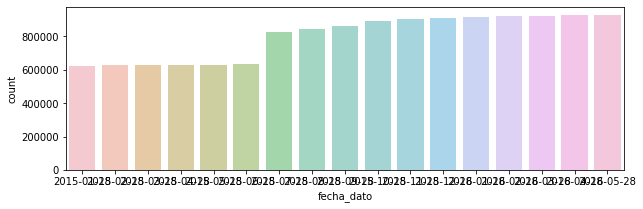

col :  ind_empleado


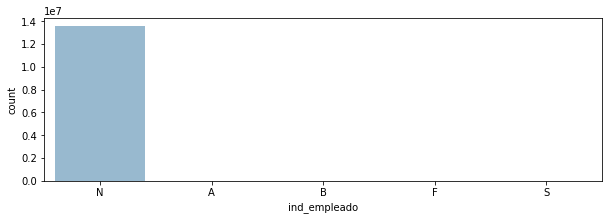

col :  pais_residencia


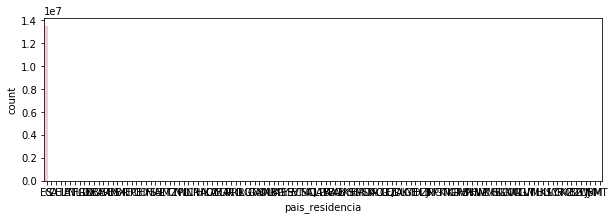

col :  sexo


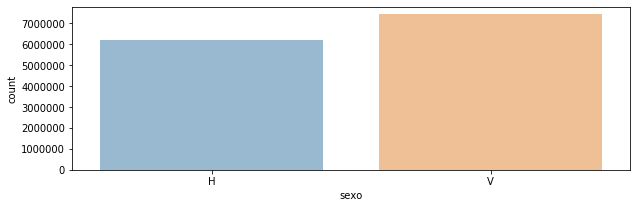

col :  age


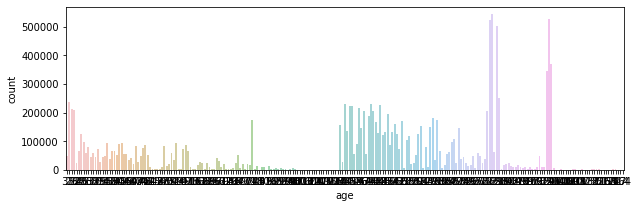

col :  fecha_alta


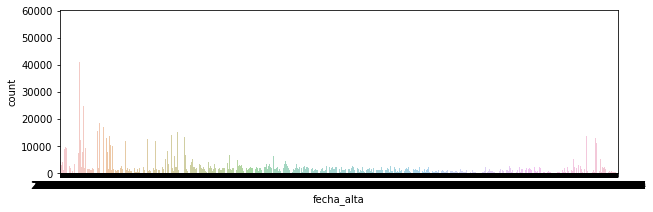

col :  ind_nuevo


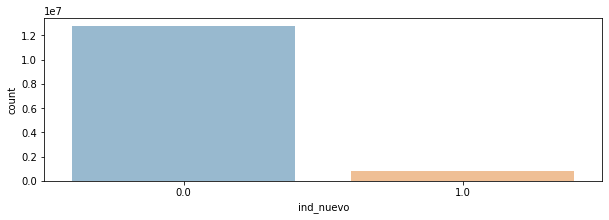

col :  antiguedad


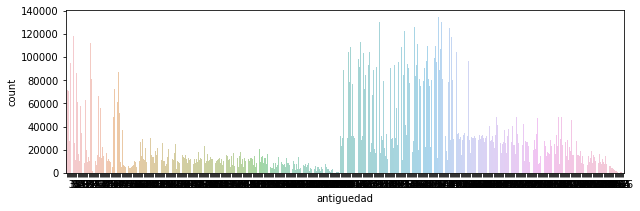

col :  indrel


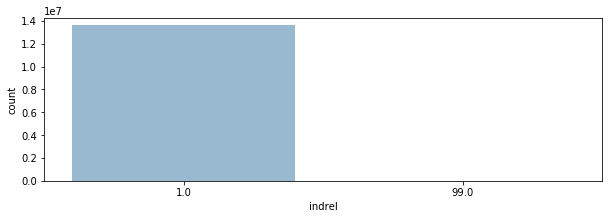

col :  ult_fec_cli_1t


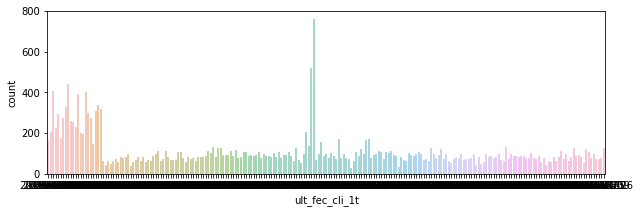

col :  indrel_1mes


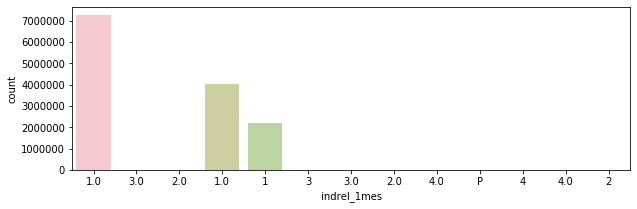

col :  tiprel_1mes


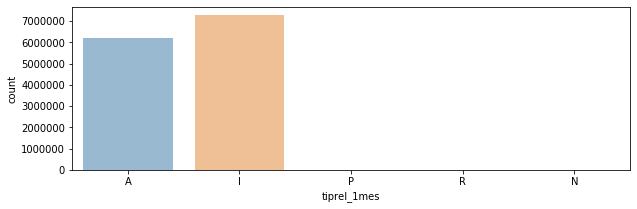

col :  indresi


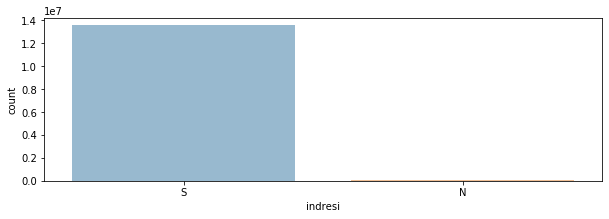

col :  indext


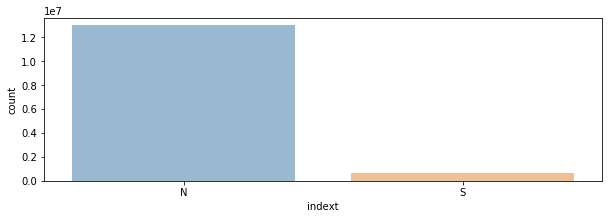

col :  conyuemp


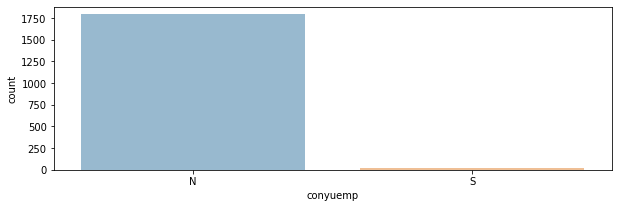

col :  canal_entrada


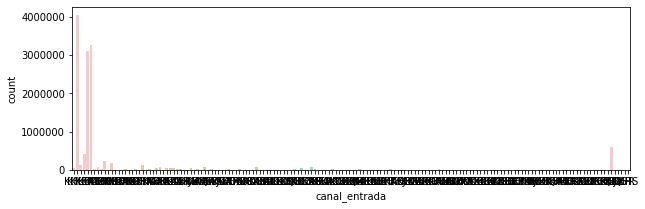

col :  indfall


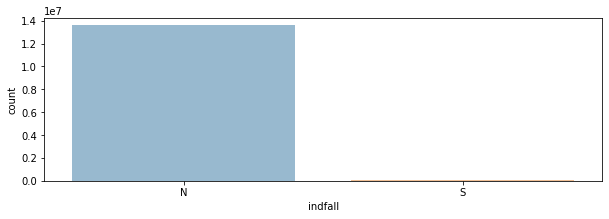

col :  tipodom


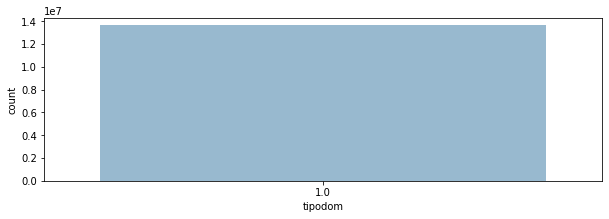

col :  cod_prov


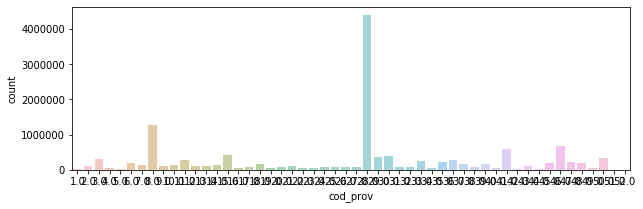

col :  nomprov


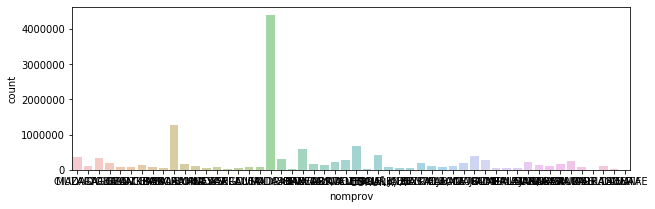

col :  ind_actividad_cliente


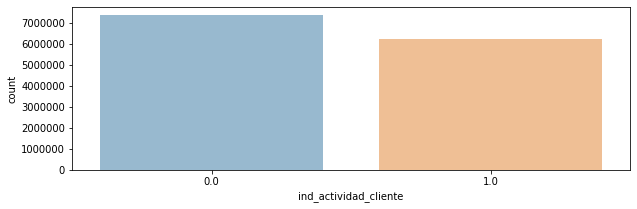

col :  segmento


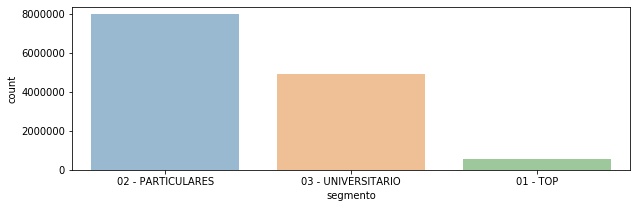

col :  ind_ahor_fin_ult1


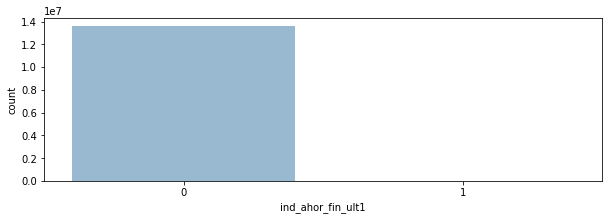

col :  ind_aval_fin_ult1


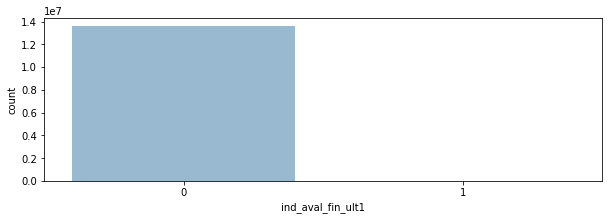

col :  ind_cco_fin_ult1


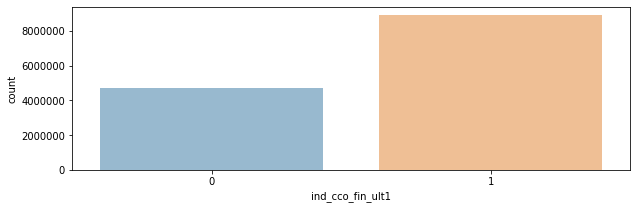

col :  ind_cder_fin_ult1


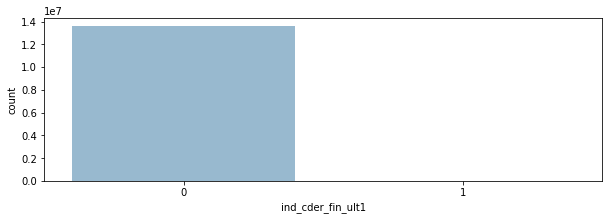

col :  ind_cno_fin_ult1


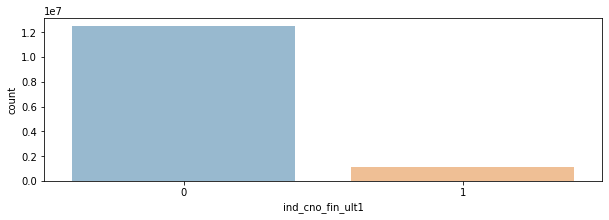

col :  ind_ctju_fin_ult1


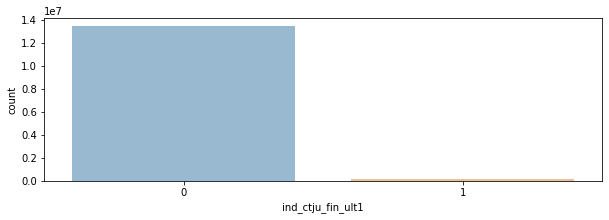

col :  ind_ctma_fin_ult1


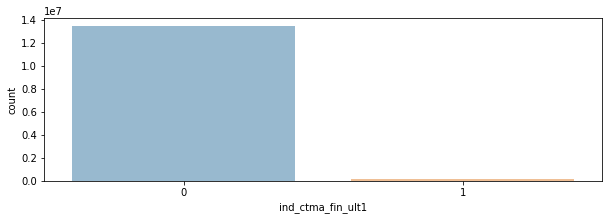

col :  ind_ctop_fin_ult1


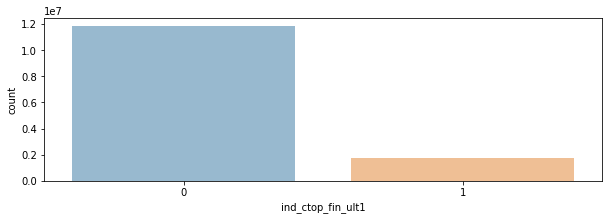

col :  ind_ctpp_fin_ult1


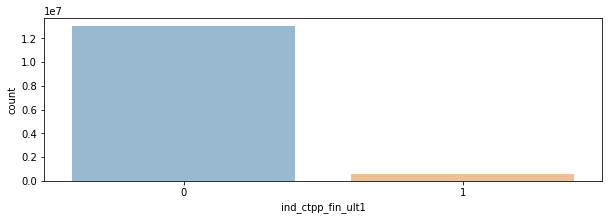

col :  ind_deco_fin_ult1


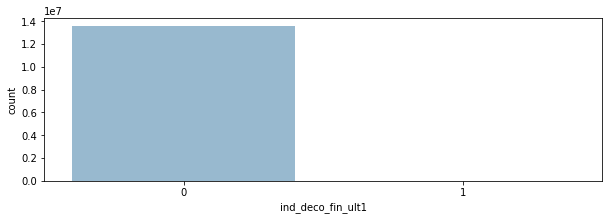

col :  ind_deme_fin_ult1


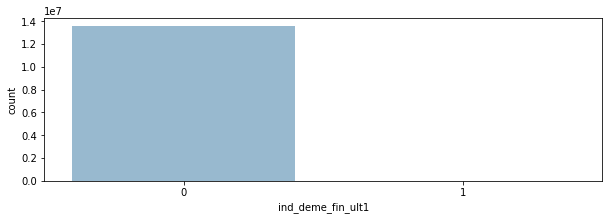

col :  ind_dela_fin_ult1


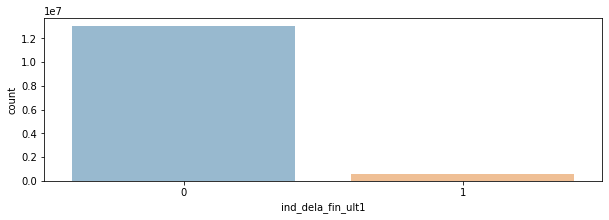

col :  ind_ecue_fin_ult1


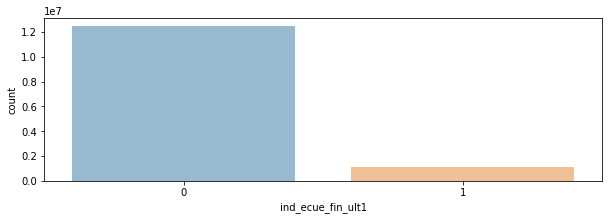

col :  ind_fond_fin_ult1


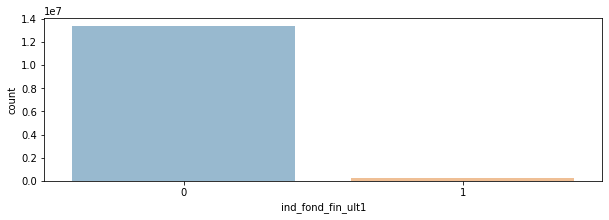

col :  ind_hip_fin_ult1


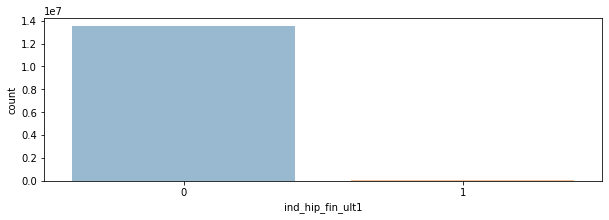

col :  ind_plan_fin_ult1


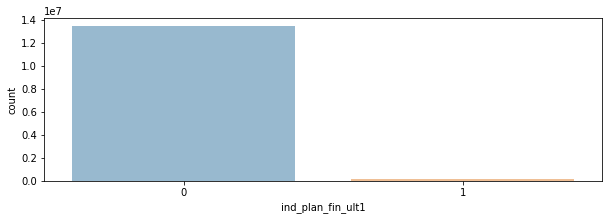

col :  ind_pres_fin_ult1


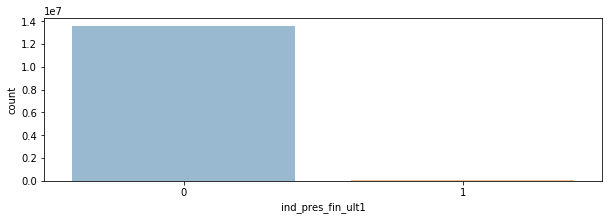

col :  ind_reca_fin_ult1


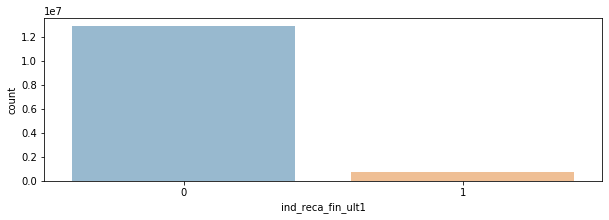

col :  ind_tjcr_fin_ult1


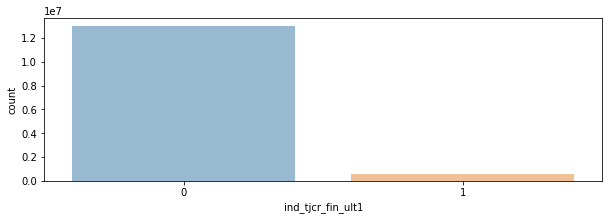

col :  ind_valo_fin_ult1


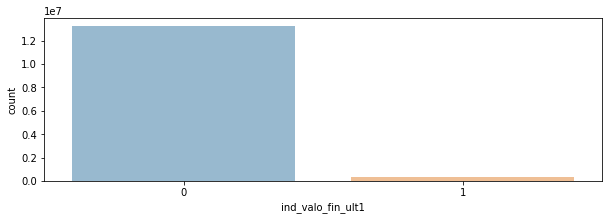

col :  ind_viv_fin_ult1


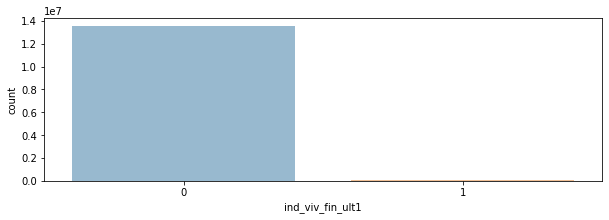

col :  ind_nomina_ult1


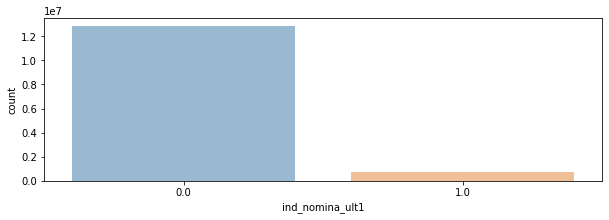

col :  ind_nom_pens_ult1


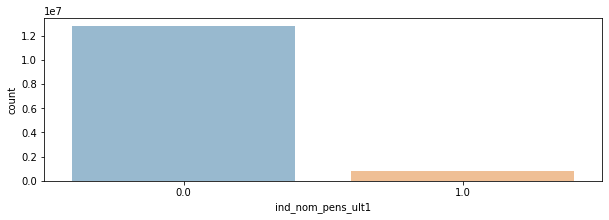

col :  ind_recibo_ult1


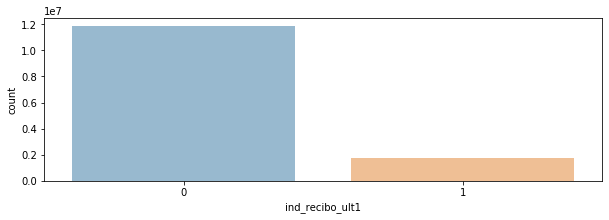

In [15]:
skip_cols = ['ncodpers', 'renta']
for col in trn.columns:
    if col in skip_cols:
        continue
        
    print('='*50)
    print('col : ', col)
    
    f, ax = plt.subplots(figsize=(10, 3))
    sns.countplot(x=col, data=trn, alpha=0.5)
    plt.show()

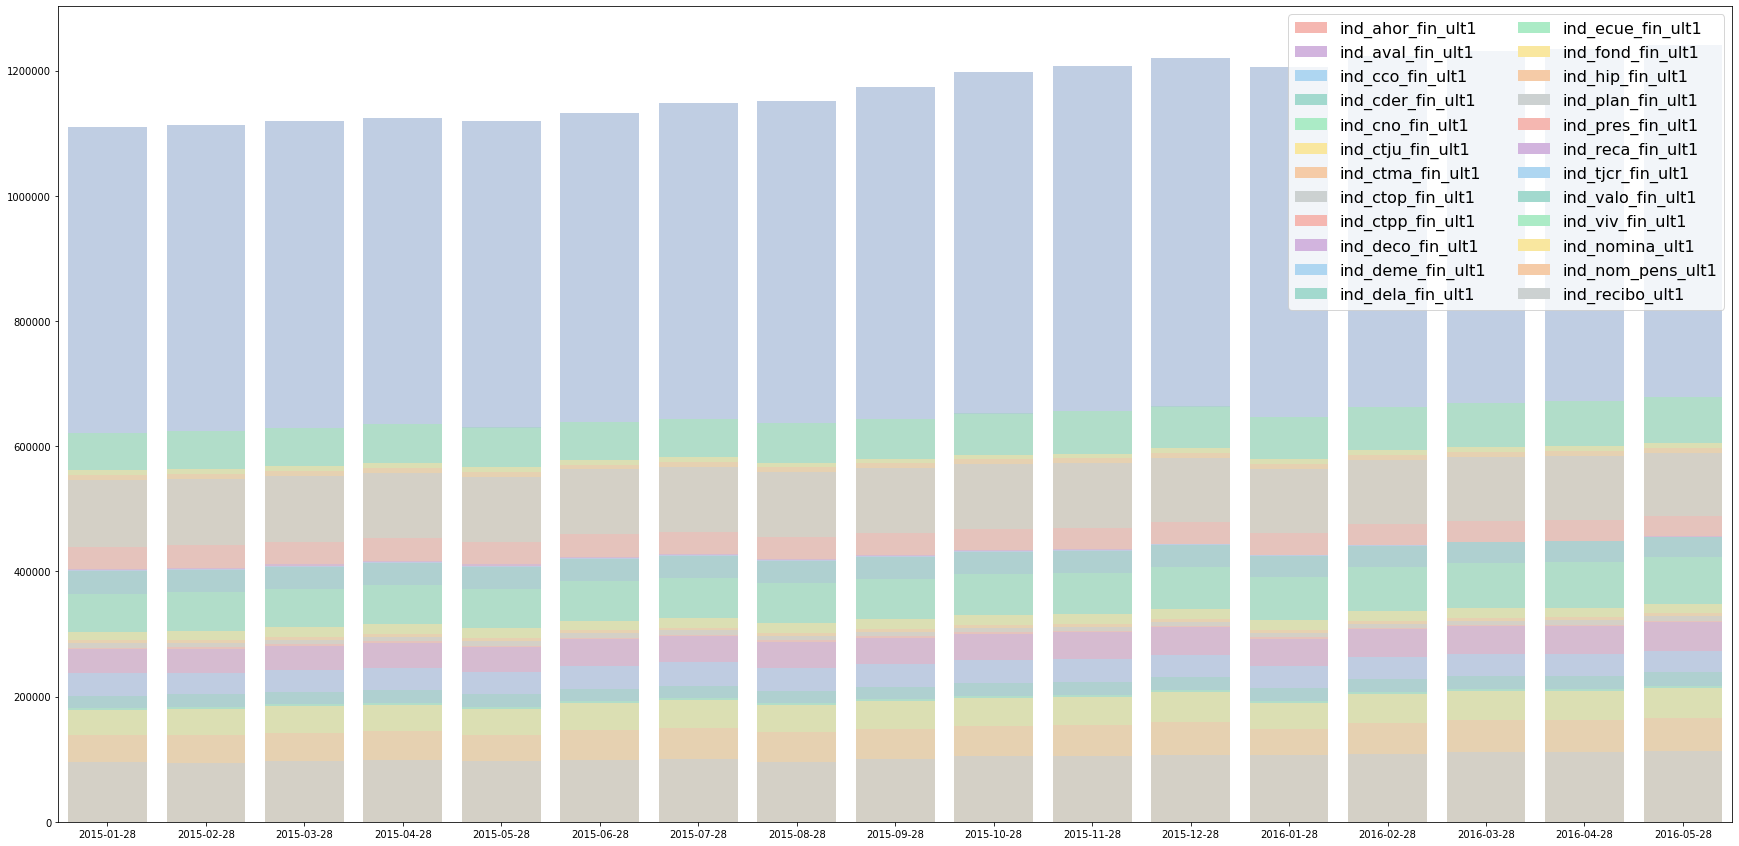

In [16]:
months = np.unique(trn['fecha_dato']).tolist()
label_cols = trn.columns[24:].tolist()

label_over_time = []
for i in range(len(label_cols)):
    label_sum = trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
    label_over_time.append(label_sum.tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color = color_list[i%8], alpha=0.7)

plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc=1, ncol = 2, prop={'size':16})

In [18]:
trn.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [19]:
# 제품 변수를 prods에 list형태로 저장한다
prods = trn.columns[24:].tolist()

# 날짜를 숫자로 변환하는 함수이다. 2015-01-28은 1, 2016-06-28은 18로 변환된다
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

# 날짜를 숫자로 변환하여 int_date에 저장한다
trn['int_date'] = trn['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사하고, int_date 날짜에 1을 더하여 lag를 생성한다. 변수명에 _prev를 추가한다.
trn_lag = trn.copy()
trn_lag['int_date'] += 1
trn_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in trn.columns]

# 원본 데이터와 lag 데이터를 ncodper와 int_date 기준으로 합친다. Lag 데이터의 int_date는 1 밀려있기 때문에, 저번달의 제품 정보가 삽입된다.
df_trn = trn.merge(trn_lag, on=['ncodpers','int_date'], how='left')

# 메모리 효율을 위해 불필요한 변수를 메모리에서 제거한다
del trn, trn_lag

# 저번달의 제품 정보가 존재하지 않을 경우를 대비하여 0으로 대체한다.
for prod in prods:
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace=True)

# 원본 데이터에서의 제품 보유 여부 – lag데이터에서의 제품 보유 여부를 비교하여 신규 구매 변수 padd를 구한다
for prod in prods:
    padd = prod + '_add'
    prev = prod + '_prev'
    df_trn[padd] = ((df_trn[prod] == 1) & (df_trn[prev] == 0)).astype(np.int8)

# 신규 구매 변수만을 추출하여 labels에 저장한다.
add_cols = [prod + '_add' for prod in prods]
labels = df_trn[add_cols].copy()
labels.columns = prods

In [20]:
labels.to_csv('/Users/kimginam/Kaggle/santander-product-recommendation/labels.csv', index=False)

In [59]:
prods = trn.columns[24:].tolist()

In [60]:
trn[prods] = trn[prods].fillna(0.0).astype(np.int8)

In [45]:
no_product = trn[prods].sum(axis=1) == 0
trn = trn[~no_product]

In [46]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11091070 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [62]:
for col in trn.columns[24:]:
    tst[col] = 0
df = pd.concat([trn, tst], axis=0)

In [89]:
features = []

In [90]:
categorical_cols = ['ind_empleado', 'pais_residencia', 'sexo', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'nomprov', 'segmento']
for col in categorical_cols:
    df[col], _ = df[col].factorize(na_sentinel=-99)
features += categorical_cols

In [91]:
df['age'].replace(' NA', -99, inplace=True)
df['age'] = df['age'].astype(np.int8)

df['antiguedad'].replace('     NA', -99, inplace=True)
df['antiguedad'] = df['antiguedad'].astype(np.int8)

df['renta'].replace('         NA', -99, inplace=True)
df['renta'].fillna(-99, inplace=True)
df['renta'] = df['renta'].astype(float).astype(np.int8)

df['indrel_1mes'].replace('P', 5, inplace=True)
df['indrel_1mes'].fillna(-99, inplace=True)
df['indrel_1mes'] = df['indrel_1mes'].astype(float).astype(np.int8)

In [92]:
df.head(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,fecha_alta_month,fecha_alta_year
0,2015-01-28,1375586,0,0,0,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0,1,2015
1,2015-01-28,1050611,0,0,1,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,8,2012
2,2015-01-28,1050612,0,0,1,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,8,2012
3,2015-01-28,1050613,0,0,0,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,8,2012
4,2015-01-28,1050614,0,0,1,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,8,2012
5,2015-01-28,1050615,0,0,0,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,8,2012
6,2015-01-28,1050616,0,0,0,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,8,2012
7,2015-01-28,1050617,0,0,0,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,8,2012
8,2015-01-28,1050619,0,0,0,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,8,2012
9,2015-01-28,1050620,0,0,0,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,8,2012


In [93]:
features += ['age','antiguedad','renta','ind_nuevo','indrel','indrel_1mes','ind_actividad_cliente']

In [94]:
df['fecha_alta_month'] = df['fecha_alta'].map(lambda x: 0.0 if x.__class__ is float else float(x.split('-')[1])).astype(np.int8)
df['fecha_alta_year'] = df['fecha_alta'].map(lambda x: 0.0 if x.__class__ is float else float(x.split('-')[0])).astype(np.int16)
features += ['fecha_alta_month', 'fecha_alta_year']

In [96]:
df['ult_fec_cli_1t_month'] = df['ult_fec_cli_1t'].map(lambda x: 0.0 if x.__class__ is float else float(x.split('-')[1])).astype(np.int8)
df['ult_fec_cli_1t_year'] = df['ult_fec_cli_1t'].map(lambda x: 0.0 if x.__class__ is float else float(x.split('-')[0])).astype(np.int16)
features += ['ult_fec_cli_1t_month', 'ult_fec_cli_1t_year']

In [98]:
df.fillna(-99, inplace=True)

In [99]:
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")] 
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

In [100]:
df['int_date'] = df['fecha_dato'].map(date_to_int).astype(np.int8)

In [101]:
df_lag = df.copy()
df_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in df.columns ]
df_lag['int_date'] += 1

In [102]:
df_trn = df.merge(df_lag, on=['ncodpers','int_date'], how='left')

In [103]:
del df, df_lag

In [104]:
for prod in prods:
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace=True)
df_trn.fillna(-99, inplace=True)

In [105]:
features += [feature + '_prev' for feature in features]
features += [prod + '_prev' for prod in prods]

In [106]:
use_dates = ['2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28']
trn = df_trn[df_trn['fecha_dato'].isin(use_dates)]
tst = df_trn[df_trn['fecha_dato'] == '2016-06-28']
del df_trn

In [107]:
X = []
Y = []
for i, prod in enumerate(prods):
    prev = prod + '_prev'
    prX = trn[(trn[prod] == 1) & (trn[prev] == 0)]
    prY = np.zeros(prX.shape[0], dtype=np.int8) + i
    X.append(prX)
    Y.append(prY)
XY = pd.concat(X)
Y = np.hstack(Y)
XY['y'] = Y

In [108]:
vld_date = '2016-05-28'
XY_trn = XY[XY['fecha_dato'] != vld_date]
XY_vld = XY[XY['fecha_dato'] == vld_date]